활성함수를 사용해 변형된 sigmoid 함수를 학습해 봅시다.

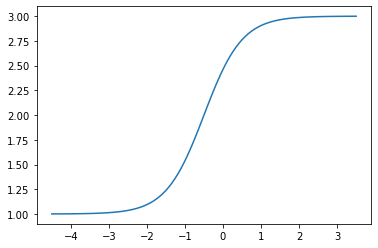

In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 2 / (1+np.exp(-(2*x+1))) + 1

x = np.linspace(-0.5-4,-0.5+4,100)
plt.plot(x, f(x))
plt.show()

위의 함수는 sigmoid 가 x 와 y 축 방향으로 축소, 확대 되고 이동한 함수입니다.

In [2]:
x_train = np.random.rand(1024,1)*10-5
y_train = f(x_train)

x_test = np.linspace(-0.5-2, -0.5+2, num=5).reshape((-1,1))
y_test = f(x_test)

위와 같이 변화가 일어나는 영역을 충분히 포함하는 학습데이터를 만들었습니다.

Train on 819 samples, validate on 205 samples
Epoch 1/100
819/819 [==============================] - 1s 1ms/sample - loss: 0.3863 - val_loss: 0.0206
Epoch 2/100
819/819 [==============================] - 0s 540us/sample - loss: 0.0120 - val_loss: 0.0070
Epoch 3/100
819/819 [==============================] - 0s 569us/sample - loss: 0.0048 - val_loss: 0.0032
Epoch 4/100
819/819 [==============================] - 0s 572us/sample - loss: 0.0025 - val_loss: 0.0020
Epoch 5/100
819/819 [==============================] - 0s 550us/sample - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
819/819 [==============================] - 0s 571us/sample - loss: 0.0010 - val_loss: 8.1561e-04
Epoch 7/100
819/819 [==============================] - 0s 577us/sample - loss: 6.8882e-04 - val_loss: 5.7246e-04
Epoch 8/100
819/819 [==============================] - 0s 563us/sample - loss: 4.9177e-04 - val_loss: 4.4517e-04
Epoch 9/100
819/819 [==============================] - 0s 604us/sample - loss: 3.5751e-04 - val_

Epoch 73/100
819/819 [==============================] - 0s 570us/sample - loss: 5.1105e-11 - val_loss: 4.4797e-11
Epoch 74/100
819/819 [==============================] - 0s 550us/sample - loss: 4.0908e-11 - val_loss: 3.4998e-11
Epoch 75/100
819/819 [==============================] - 0s 586us/sample - loss: 3.2432e-11 - val_loss: 2.8163e-11
Epoch 76/100
819/819 [==============================] - 0s 582us/sample - loss: 2.5799e-11 - val_loss: 2.2586e-11
Epoch 77/100
819/819 [==============================] - 0s 604us/sample - loss: 2.0688e-11 - val_loss: 1.8178e-11
Epoch 78/100
819/819 [==============================] - 0s 548us/sample - loss: 1.6710e-11 - val_loss: 1.5021e-11
Epoch 79/100
819/819 [==============================] - 0s 559us/sample - loss: 1.3902e-11 - val_loss: 1.2386e-11
Epoch 80/100
819/819 [==============================] - 0s 585us/sample - loss: 1.1692e-11 - val_loss: 1.0564e-11
Epoch 81/100
819/819 [==============================] - 0s 548us/sample - loss: 1.0125e-

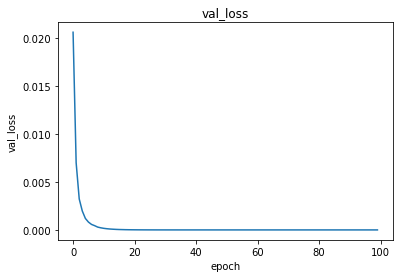

y_pred
[[1.0359721]
 [1.2384087]
 [2.0000005]
 [2.761592 ]
 [2.9640281]]
y_test
[[1.03597242]
 [1.23840584]
 [2.        ]
 [2.76159416]
 [2.96402758]]


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, name='d1', input_dim=1))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Dense(1, name='d2'))

sgd = keras.optimizers.SGD(lr=0.05)
model.compile(sgd, 'mse')
hist = model.fit(x_train, y_train, batch_size=4, epochs=100, validation_split=0.2)

plt.plot(hist.history['val_loss'])
plt.title('val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

y_pred = model.predict(x_test)
print('y_pred')
print(y_pred)
print('y_test')
print(y_test)

In [4]:
d1_weights = model.get_layer('d1').get_weights()
d2_weights = model.get_layer('d2').get_weights()

print('d1_weights'); print(d1_weights)
print('d2_weights'); print(d2_weights)

d1_weights
[array([[1.9999814]], dtype=float32), array([0.9999913], dtype=float32)]
d2_weights
[array([[2.0000036]], dtype=float32), array([0.99999833], dtype=float32)]


(w1, b1) = (2, 1), (w2, b2) = (2, 1) 혹은 (w1, b1) = (-2, -1), (w2, b2) = (-2, 3) 으로 학습된 것을 알 수 있다.